# CS677 Machine Learning Final Project
## Caffeine Content of Coffee

by Kelsey Woods and Aayushi Verma

We are using a dataset titled [2023/W9: High Street Coffee Caffeine Content](https://data.world/makeovermonday/2023w9) by data.world. It lists the caffeine amounts in coffee drinks of various sizes at different coffee shop brands.

In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

### Preparation & EDA

We start by performing Exploratory Data Analysis and cleaning on this dataset to prepare for the machine learning process.

In [2]:
# reading data
df = pd.read_excel("data/Coffee Caffeine Content.xlsx")

In [3]:
# checking data structure
df.head(15)

,Chain,Product,Caffeine (mg),Drink size (ml)
0,Caffe Nero,Single-shot Espresso,45,30
1,Caffe Nero,Cappuccino,115,355
2,Costa,Single-shot Espresso,100,30
3,Costa,Cappuccino,325,362
4,Greggs,Single-shot Espresso,75,28
5,Greggs,Cappuccino,197,341
6,Greggs,Filter/Brewed Coffee,225,341
7,Pret,Single-shot Espresso,180,30
8,Pret,Cappuccino,180,350
9,Pret,Filter/Brewed Coffee,271,350


In [4]:
# checking data content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Chain            13 non-null     object
 1   Product          13 non-null     object
 2   Caffeine (mg)    13 non-null     int64 
 3   Drink size (ml)  13 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 548.0+ bytes


In [5]:
# dropping NA values
for column in df.columns:
    df[column].dropna(inplace=True)

<Axes: >

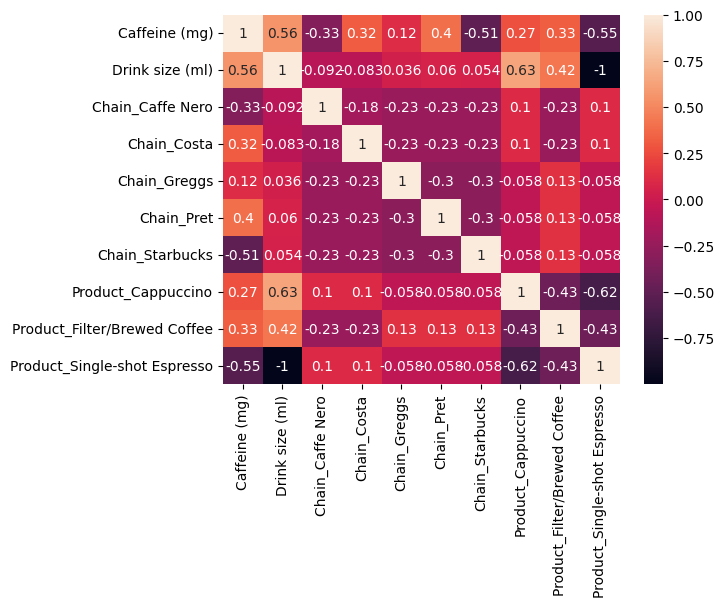

In [6]:
# performing label encoding of data and displaying correlation matrix
df_e = pd.get_dummies(df)
corrMatrix_e = df_e.corr()
sns.heatmap(corrMatrix_e, annot=True)

In [7]:
# dropping Chain and Product columns
df.drop('Chain', axis=1, inplace=True)
df.drop('Product', axis=1, inplace=True)

<Axes: >

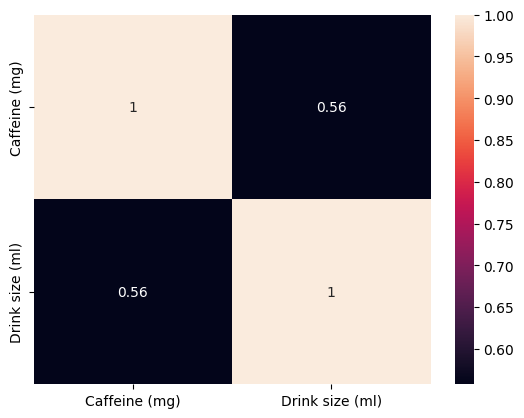

In [8]:
# checking correlation matrix again
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [9]:
# checking data structure again
df.head()

,Caffeine (mg),Drink size (ml)
0,45,30
1,115,355
2,100,30
3,325,362
4,75,28


Text(0.5, 1.0, 'Histogram of Distinct Caffeine Amounts in Dataset')

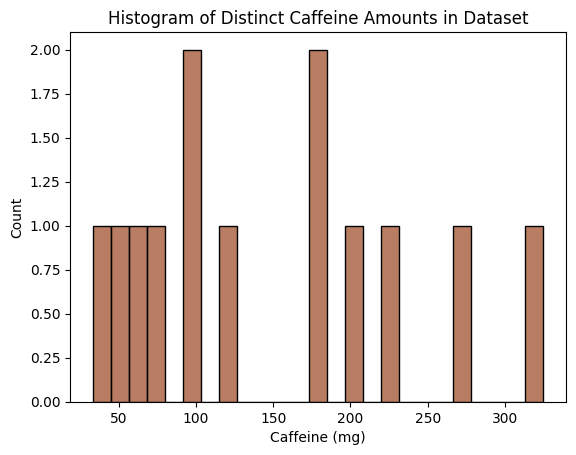

In [10]:
# EDA for one column
sns.histplot(df['Caffeine (mg)'], bins=25, color='sienna')
plt.title('Histogram of Distinct Caffeine Amounts in Dataset')

Text(0.5, 1.0, 'Histogram of Distinct Drink Sizes in Dataset')

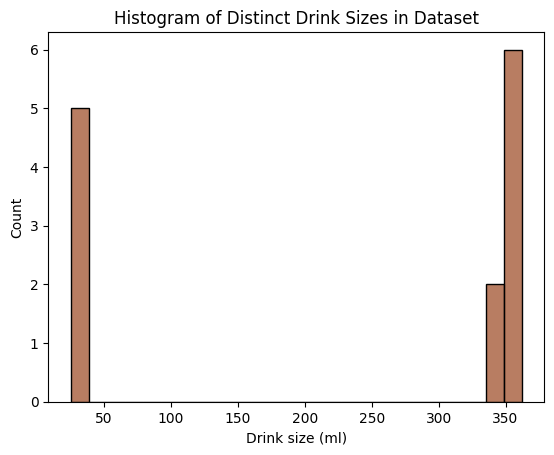

In [11]:
# EDA for another column
sns.histplot(df['Drink size (ml)'], bins=25, color='sienna')
plt.title('Histogram of Distinct Drink Sizes in Dataset')

Text(0.5, 1.0, 'Drink Size vs Caffeine Content')

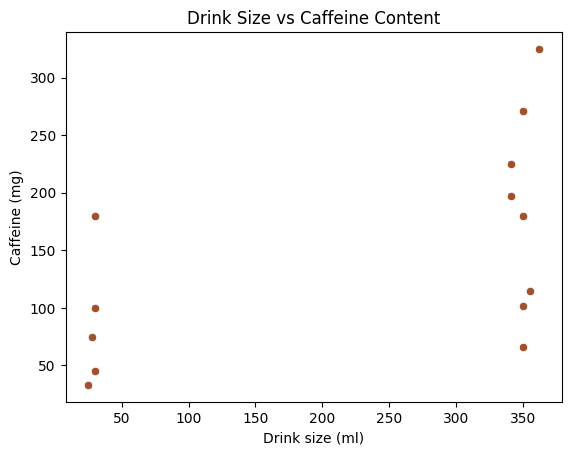

In [12]:
# scatterplot time!
sns.scatterplot(x='Drink size (ml)', y='Caffeine (mg)', data=df,
                color='sienna')
plt.title('Drink Size vs Caffeine Content')

### Machine Learning

Now we perform machine learning on our cleaned dataset. 

In [13]:
def a_rsquare(X, r2):
    """
    Function to calculate adjusted R-squared value.

    Input
    -----
    X (pd.DataFrame): Dataframe with values.
    r2 (float): R-squared value.

    Output
    ------
    a_rsquare (float): Adjusted R-squared value.
    """
    # p is the num of features in the dataset
    p = len(X.columns)
    # n is the total num of rows in the dataset
    n = len(X)

    numerator = (1 - r2) * (n - 1)
    denominator = n - p - 1
    a_rsquare = 1 - (numerator / denominator)
    return a_rsquare

def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

def gradient(x, y_pred, y_true):
    return 2 * np.dot(x.T, (y_pred - y_true)) / len(y_true)

In [14]:
# defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["ml_algorithm","mae","mse","rmse","r2","adjusted_r2","cross_val"]
results = pd.DataFrame(columns=column_names)

In [15]:
# preparing train/test datasets
X = df.drop(['Caffeine (mg)'],axis=1)
y = df['Caffeine (mg)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#### 1. Decision Tree Classifier

In [16]:
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_83900/3974740912.py:16: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


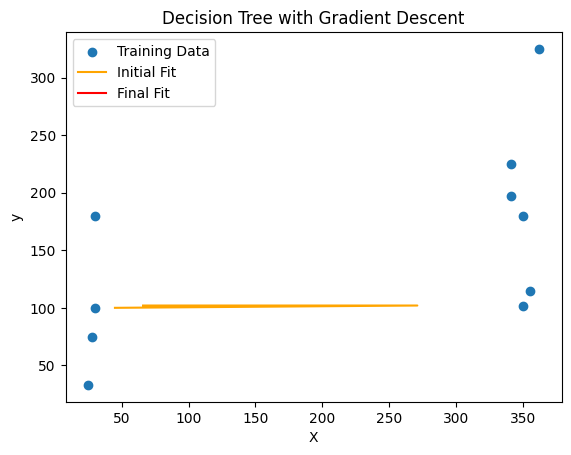

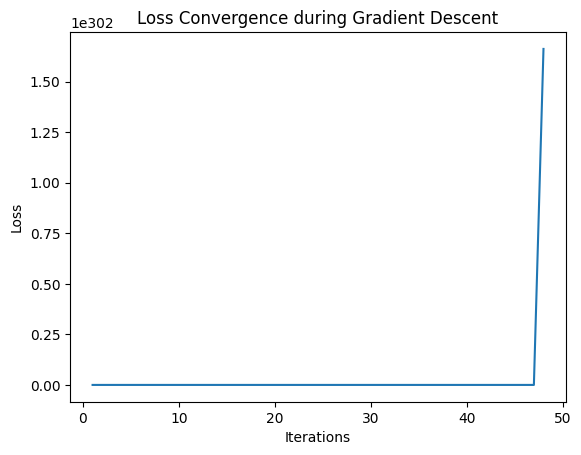

Optimal theta: [nan nan]


In [21]:
learning_rate = 0.01
num_iterations = 1000

X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(y_test, y_pred, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

In [23]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("R-squared (R2): {:.3f}".format(r2))

Mean Squared Error (MSE): 10960.667
Mean Absolute Error (MAE): 86.667
R-squared (R2): -0.055


In [25]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of the scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print the cross-validation results
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE: {:.3f}".format(cv_mean))
print("Standard Deviation of Cross-Validation MSE: {:.3f}".format(cv_std))

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
results.loc[len(results)] = [
    "Decision Tree",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2), # adjusted r2
    cv_mean
]
results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2,cross_val
0,Decision Tree,86.666667,10960.666667,104.693203,-0.054564,-0.150433,8695.829831


### Linear Regression

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
training_data_prediction = lin_reg_model.predict(X_train)
y_pred = lin_reg_model.predict(X_test)

<ipython-input-579-74e7c148c6c6>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


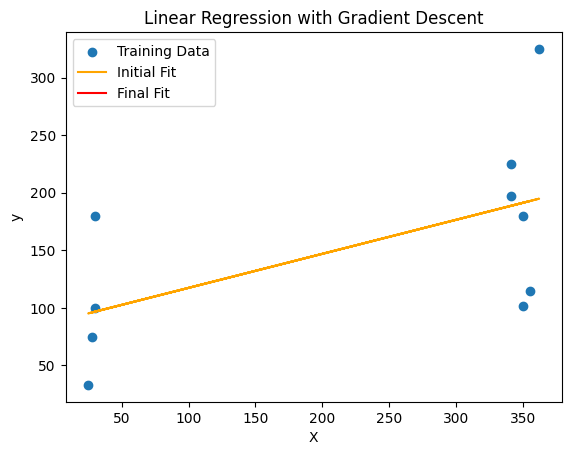

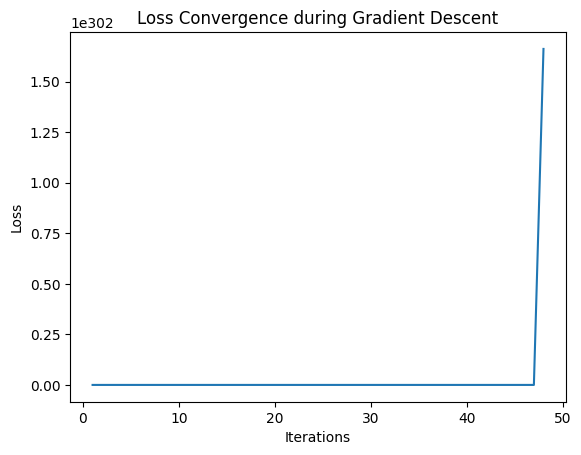

Optimal theta: [nan nan]


In [ ]:
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

def gradient(x, y_pred, y_true):
    return 2 * np.dot(x.T, (y_pred - y_true)) / len(y_true)

learning_rate = 0.01
num_iterations = 1000


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, training_data_prediction, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

<ipython-input-580-bc8f720ecf51>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


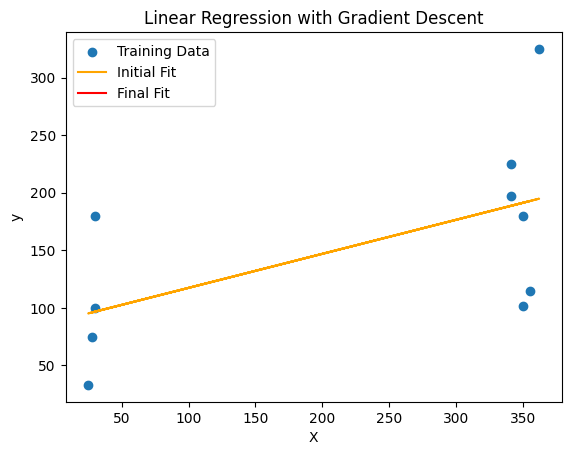

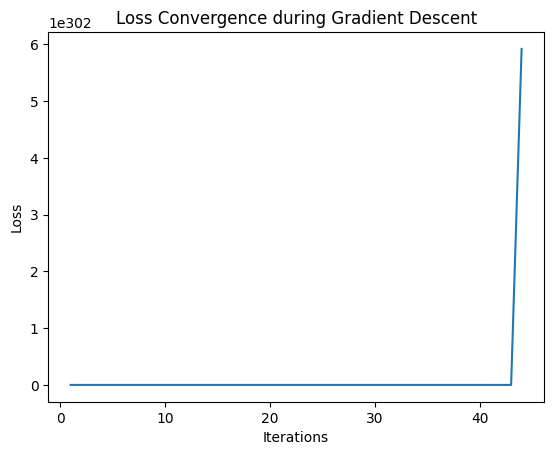

Optimal theta: [nan nan]


In [ ]:
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

def gradient(x, y_pred, y_true):
    return 2 * np.dot(x.T, (y_pred - y_true)) / len(y_true)

learning_rate = 0.02
num_iterations = 1000


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, training_data_prediction, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("R-squared (R2): {:.3f}".format(r2))

Mean Squared Error (MSE): 8239.658
Mean Absolute Error (MAE): 85.547
R-squared (R2): 0.207


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(lin_reg_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of the scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print the cross-validation results
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE: {:.3f}".format(cv_mean))
print("Standard Deviation of Cross-Validation MSE: {:.3f}".format(cv_std))

Cross-Validation MSE Scores: [ 3124.29601919  9410.87417421  5364.96053145  6910.21219489
 18668.80623432]
Mean Cross-Validation MSE: 8695.830
Standard Deviation of Cross-Validation MSE: 5390.671


In [ ]:
results.loc[len(results)] = [
    "linear_regression",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2), # adjusted r2
    cv_mean
]
results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2,cross_val
0,Decision Tree,86.666667,10960.666667,104.693203,-0.054564,-0.150433,8695.829831
1,linear_regression,85.546703,8239.657777,90.772561,0.207234,0.135164,8695.829831


### Support Vector Regression

In [ ]:
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X, y)
y_pred = svr_model.predict(X_test)

<ipython-input-609-7b93254a1161>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


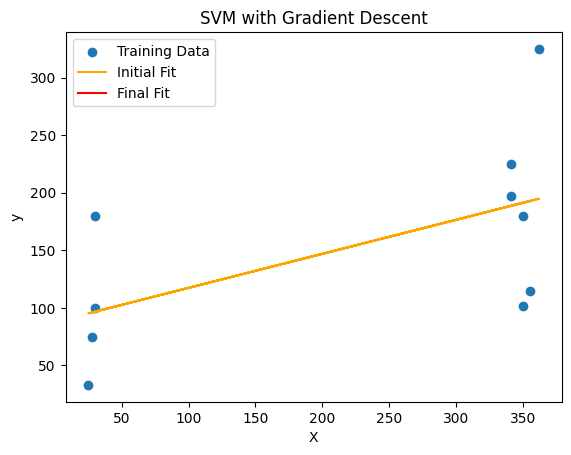

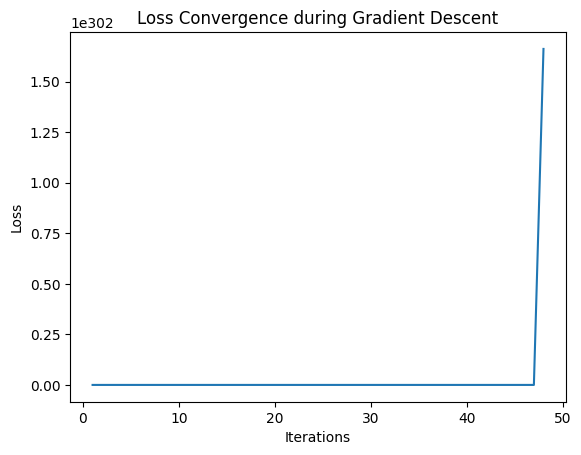

Optimal theta: [nan nan]


In [ ]:
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

def gradient(x, y_pred, y_true):
    return 2 * np.dot(x.T, (y_pred - y_true)) / len(y_true)

learning_rate = 0.01
num_iterations = 1000


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, training_data_prediction, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVM with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

In [ ]:
# Calculate metrics
mse = mean_squared_error(y, svr_model.predict(X))
mae = mean_absolute_error(y, svr_model.predict(X))
r2 = r2_score(y, svr_model.predict(X))

# Print the metrics
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("R-squared (R2): {:.3f}".format(r2))


Mean Squared Error (MSE): 2693.854
Mean Absolute Error (MAE): 34.346
R-squared (R2): 0.643


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of the scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print the cross-validation results
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE: {:.3f}".format(cv_mean))
print("Standard Deviation of Cross-Validation MSE: {:.3f}".format(cv_std))

Cross-Validation MSE Scores: [ 9867.25707106 14227.67099275  4424.69143155 18896.28448182
  9559.1922184 ]
Mean Cross-Validation MSE: 11395.019
Standard Deviation of Cross-Validation MSE: 4869.963


<ipython-input-610-82d89c44a048>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


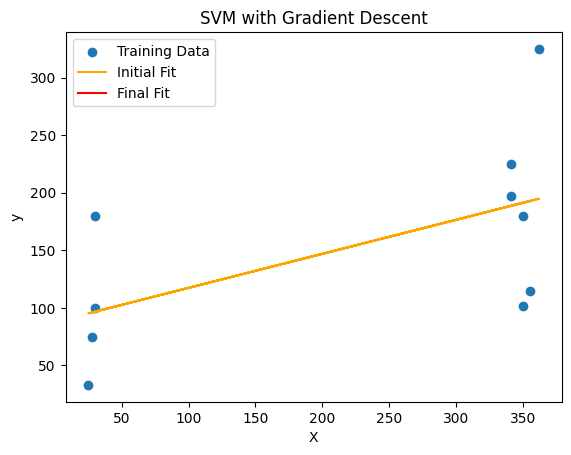

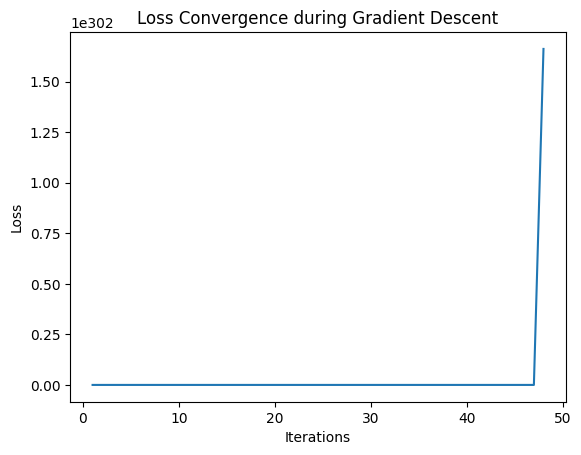

Optimal theta: [nan nan]


In [ ]:
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

def gradient(x, y_pred, y_true):
    return 2 * np.dot(x.T, (y_pred - y_true)) / len(y_true)

learning_rate = 0.01
num_iterations = 2000


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, training_data_prediction, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVM with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

In [ ]:
results.loc[len(results)] = [
    "support_vector_regression",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2), # adjusted r2
    cv_mean
]
results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2,cross_val
0,Decision Tree,86.666667,10960.666667,104.693203,-0.054564,-0.150433,8695.829831
1,linear_regression,85.546703,8239.657777,90.772561,0.207234,0.135164,8695.829831
2,support_vector_regression,34.346116,2693.854148,51.902352,0.643468,0.611056,11395.019239


### Lasso Regression

In [ ]:
# Create Lasso model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
# Fit the model
lasso_model.fit(X, y)

Lasso(alpha=0.1)

In [ ]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Make predictions
y_pred = lasso_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<ipython-input-607-43405481a56c>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


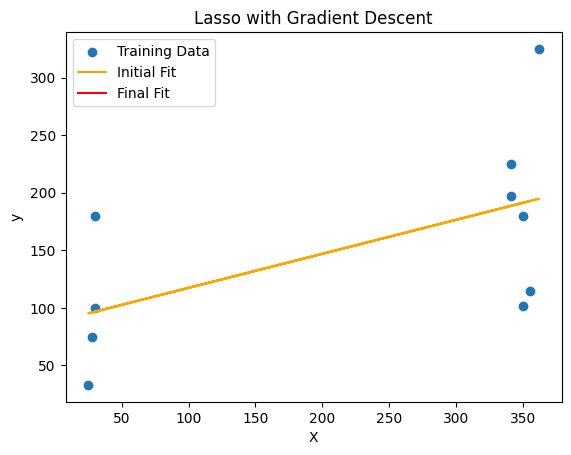

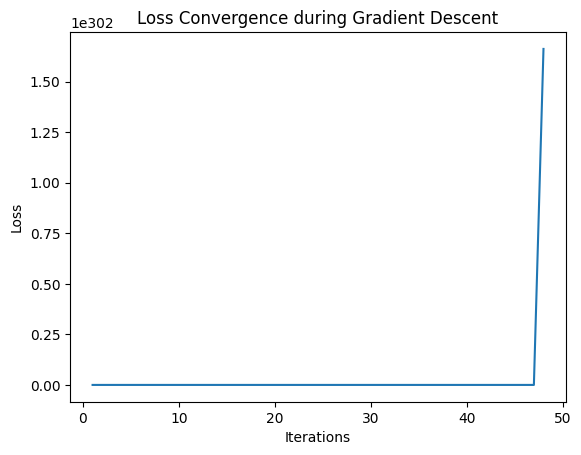

Optimal theta: [nan nan]


In [ ]:
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

def gradient(x, y_pred, y_true):
    return 2 * np.dot(x.T, (y_pred - y_true)) / len(y_true)

learning_rate = 0.01
num_iterations = 1000


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, training_data_prediction, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

<ipython-input-608-3a5532c632a4>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


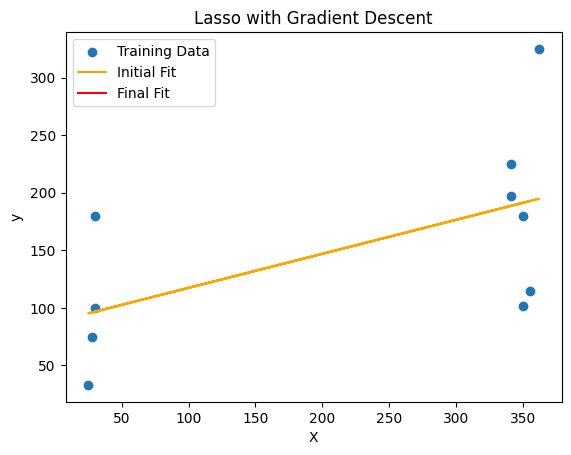

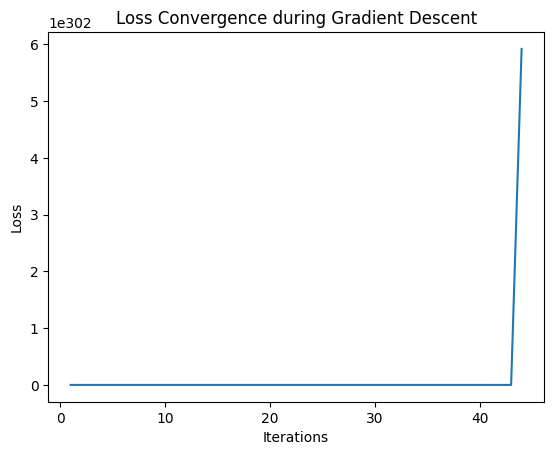

Optimal theta: [nan nan]


In [ ]:


learning_rate = 0.02
num_iterations = 2000


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, training_data_prediction, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

In [ ]:
# Calculate metrics
y_pred_train = lasso_model.predict(X)
mse = mean_squared_error(y, y_pred_train)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

# Print the metrics
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("R-squared (R2): {:.3f}".format(r2))

Mean Squared Error (MSE): 5206.014
Mean Absolute Error (MAE): 59.202
R-squared (R2): 0.311


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of the scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print the cross-validation results
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE: {:.3f}".format(cv_mean))
print("Standard Deviation of Cross-Validation MSE: {:.3f}".format(cv_std))

Cross-Validation MSE Scores: [ 3124.30102122  9410.95652881  5364.91629732  6910.31737477
 18668.65165119]
Mean Cross-Validation MSE: 8695.829
Standard Deviation of Cross-Validation MSE: 5390.613


In [ ]:
results.loc[len(results)] = [
    "lasso_regression",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2), # adjusted r2
    cv_mean
]
results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2,cross_val
0,Decision Tree,86.666667,10960.666667,104.693203,-0.054564,-0.150433,8695.829831
1,linear_regression,85.546703,8239.657777,90.772561,0.207234,0.135164,8695.829831
2,support_vector_regression,34.346116,2693.854148,51.902352,0.643468,0.611056,11395.019239
3,lasso_regression,59.201857,5206.013814,72.152712,0.310983,0.248346,8695.828575


### Random Forest

In [ ]:
# Create Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rf_model.fit(X, y)

RandomForestRegressor(random_state=0)

In [ ]:
# Generate data for predictions
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Make predictions
y_pred = rf_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<ipython-input-606-b3b5112034d5>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient_value


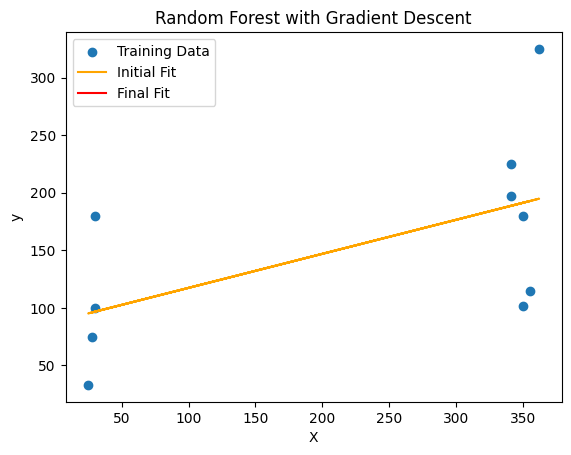

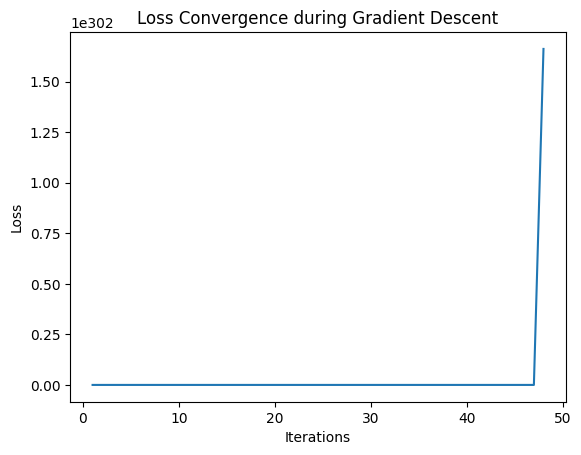

Optimal theta: [nan nan]


In [ ]:
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

def gradient(x, y_pred, y_true):
    return 2 * np.dot(x.T, (y_pred - y_true)) / len(y_true)

learning_rate = 0.01
num_iterations = 1000


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize theta (model parameters)
theta = np.zeros(X_train_with_intercept.shape[1])

# For visualization
loss_history = []

# Gradient descent
for _ in range(num_iterations):
    y_pred1 = np.dot(X_train_with_intercept, theta)
    gradient_value = gradient(X_train_with_intercept, y_pred1, y_train)
    theta -= learning_rate * gradient_value

    # Calculate and store loss for visualization
    loss = loss_function(y_pred1, y_train)
    loss_history.append(loss)

# Visualize the data and the linear regression fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, training_data_prediction, label='Initial Fit', color='orange')
plt.plot(X_train, np.dot(X_train_with_intercept, theta), label='Final Fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest with Gradient Descent')
plt.legend()
plt.show()

# Visualize the loss history
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence during Gradient Descent')
plt.show()

# Print the final result
print("Optimal theta:", theta)

In [ ]:
# Calculate metrics
y_pred_train = rf_model.predict(X)
mse = mean_squared_error(y, y_pred_train)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)
# Print the metrics
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("R-squared (R2): {:.3f}".format(r2))


Mean Squared Error (MSE): 3233.060
Mean Absolute Error (MAE): 44.368
R-squared (R2): 0.572


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of the scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print the cross-validation results
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE: {:.3f}".format(cv_mean))
print("Standard Deviation of Cross-Validation MSE: {:.3f}".format(cv_std))

Cross-Validation MSE Scores: [ 4127.40637487 13647.40632491  5045.47074935 13601.81342235
 16877.138281  ]
Mean Cross-Validation MSE: 10659.847
Standard Deviation of Cross-Validation MSE: 5107.434


In [ ]:
results.loc[len(results)] = [
    "random_forest",
    mae, # mae
    mse, # mse
    np.sqrt(mse), # rmse
    r2, # r2
    a_rsquare(X, r2), # adjusted r2
    cv_mean
]
results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2,cross_val
0,Decision Tree,86.666667,10960.666667,104.693203,-0.054564,-0.150433,8695.829831
1,linear_regression,85.546703,8239.657777,90.772561,0.207234,0.135164,8695.829831
2,support_vector_regression,34.346116,2693.854148,51.902352,0.643468,0.611056,11395.019239
3,lasso_regression,59.201857,5206.013814,72.152712,0.310983,0.248346,8695.828575
4,random_forest,44.367603,3233.060253,56.860006,0.572104,0.533204,10659.847030


## Results

In [ ]:
results

,ml_algorithm,mae,mse,rmse,r2,adjusted_r2,cross_val
0,Decision Tree,86.666667,10960.666667,104.693203,-0.054564,-0.150433,8695.829831
1,linear_regression,85.546703,8239.657777,90.772561,0.207234,0.135164,8695.829831
2,support_vector_regression,34.346116,2693.854148,51.902352,0.643468,0.611056,11395.019239
3,lasso_regression,59.201857,5206.013814,72.152712,0.310983,0.248346,8695.828575
4,random_forest,44.367603,3233.060253,56.860006,0.572104,0.533204,10659.847030


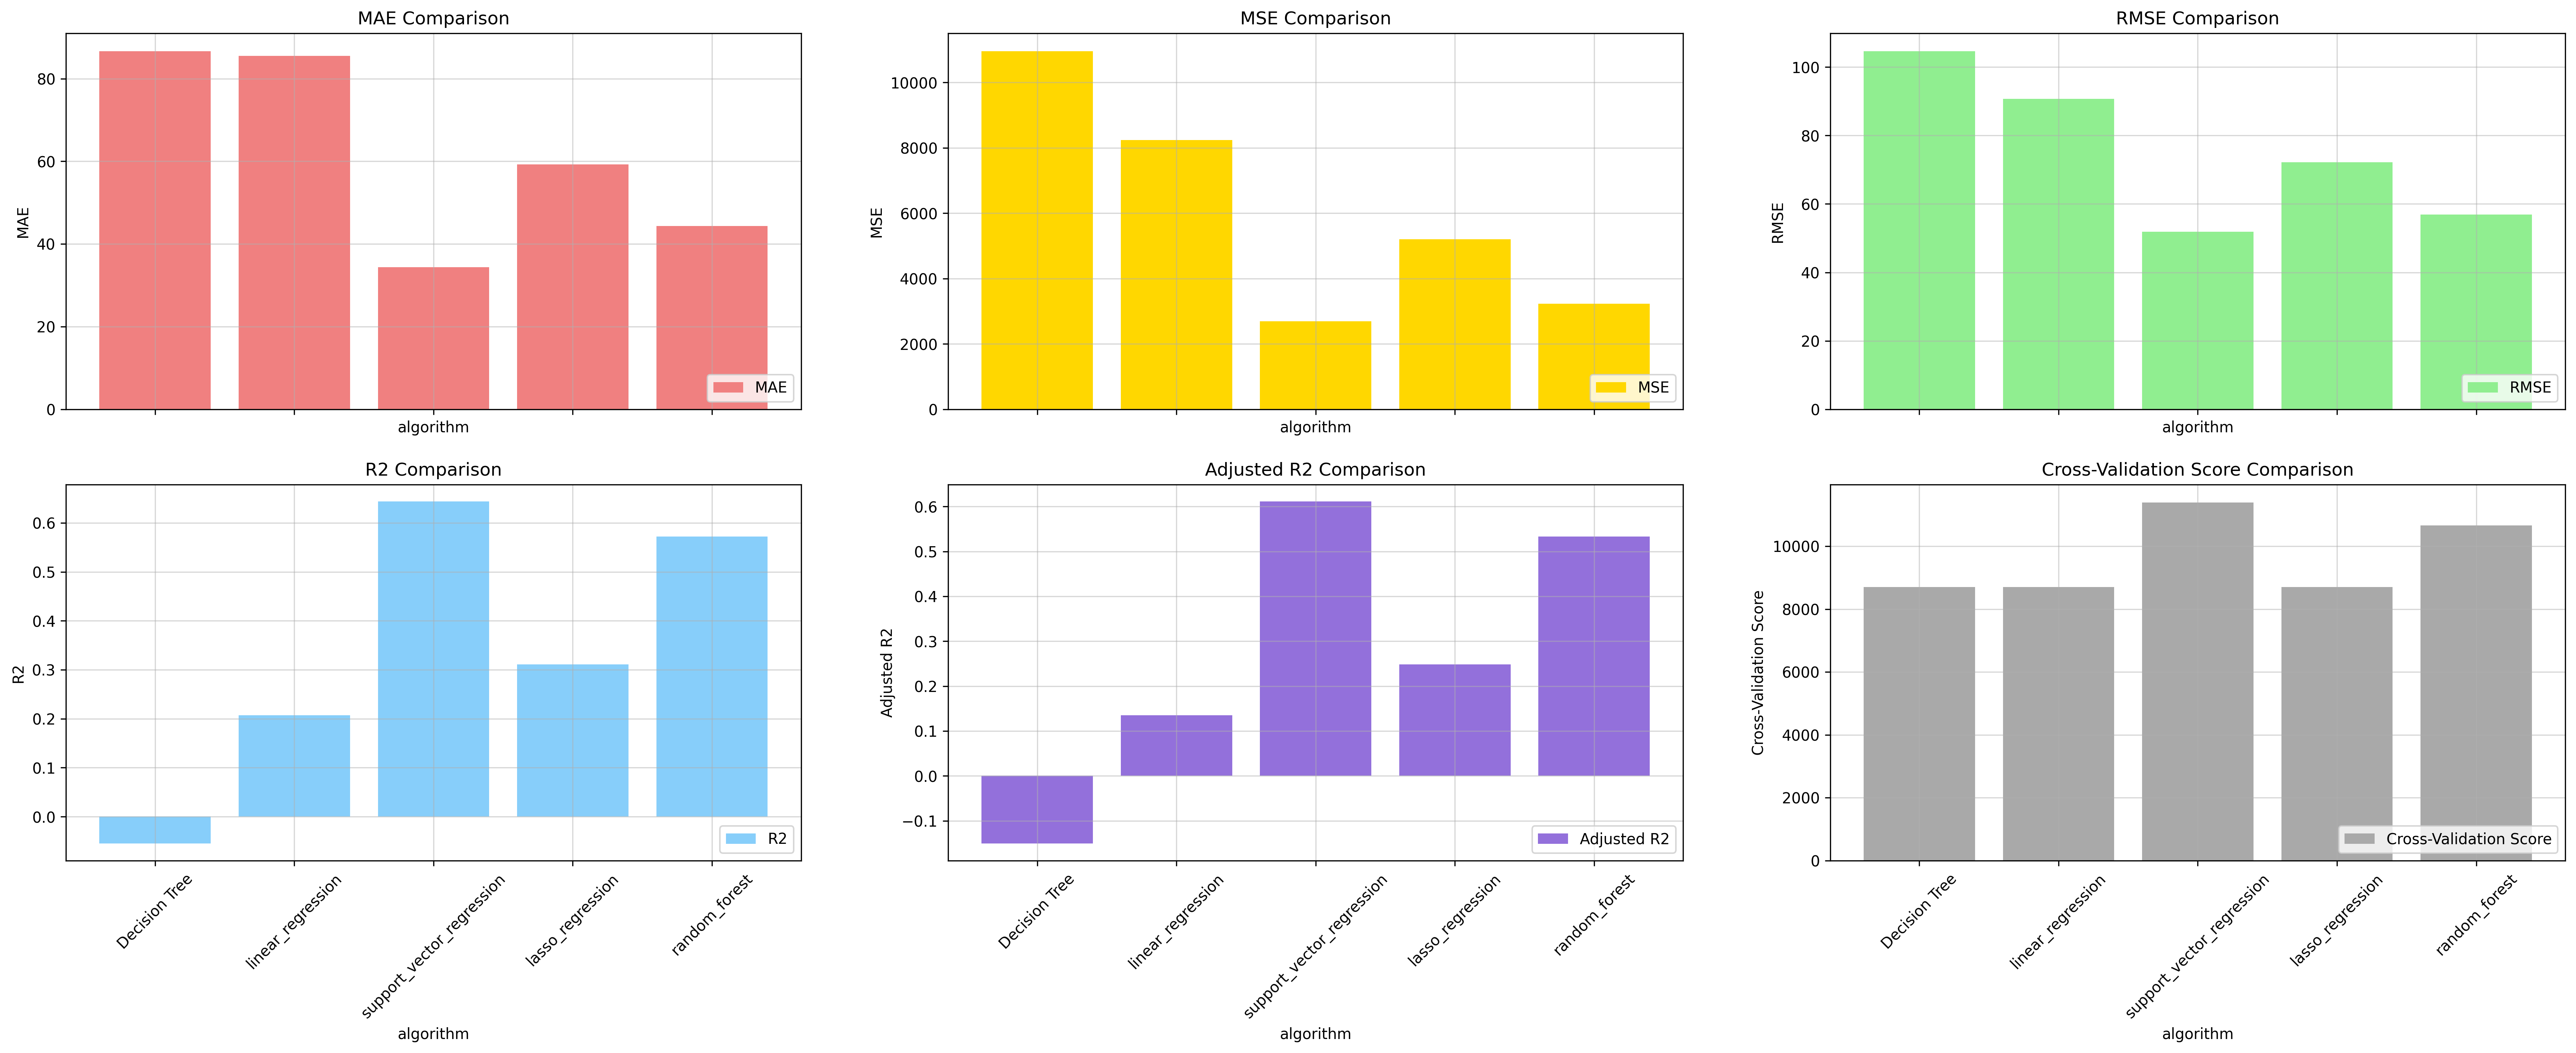

In [ ]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(30, 10), dpi=300)
x_labels = results['ml_algorithm']
indices = np.arange(len(x_labels))
width = 0.3

#row=0, col=0
ax[0,0].bar(indices,results['mae'],color="lightcoral",alpha=1,label="MAE")
ax[0,0].grid(True,alpha=0.5)
# ax[0,0].set_ylim(0,1)
ax[0,0].set_xlabel("algorithm")
ax[0,0].set_ylabel("MAE")
ax[0,0].set_title("MAE Comparison")
ax[0,0].legend(loc='lower right')
ax[0,0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[0,1].bar(indices,results['mse'],color="gold",alpha=1,label="MSE")
ax[0,1].grid(True,alpha=0.5)
# ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel("algorithm")
ax[0,1].set_ylabel("MSE")
ax[0,1].set_title("MSE Comparison")
ax[0,1].legend(loc='lower right')
ax[0,1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[0,2].bar(indices,results['rmse'],color="lightgreen",alpha=1,label="RMSE")
ax[0,2].grid(True,alpha=0.5)
# ax[0,2].set_ylim(0,1)
ax[0,2].set_xlabel("algorithm")
ax[0,2].set_ylabel("RMSE")
ax[0,2].set_title("RMSE Comparison")
ax[0,2].legend(loc='lower right')
ax[0,2].set_xticks(indices, x_labels, rotation=45)

#row=1, col=0
ax[1,0].bar(indices,results['r2'],color="lightskyblue",alpha=1,label="R2")
ax[1,0].grid(True,alpha=0.5)
# ax[1,0].set_ylim(0,1)
ax[1,0].set_xlabel("algorithm")
ax[1,0].set_ylabel("R2")
ax[1,0].set_title("R2 Comparison")
ax[1,0].legend(loc='lower right')
ax[1,0].set_xticks(indices, x_labels, rotation=45)

#row=1, col=1
ax[1,1].bar(indices,results['adjusted_r2'],color="mediumpurple",alpha=1,label="Adjusted R2")
ax[1,1].grid(True,alpha=0.5)
# ax[1,1].set_ylim(0,1)
ax[1,1].set_xlabel("algorithm")
ax[1,1].set_ylabel("Adjusted R2")
ax[1,1].set_title("Adjusted R2 Comparison")
ax[1,1].legend(loc='lower right')
ax[1,1].set_xticks(indices, x_labels, rotation=45)

#row=1, col=2
ax[1,2].bar(indices,results['cross_val'],color="darkgrey",alpha=1,label="Cross-Validation Score")
ax[1,2].grid(True,alpha=0.5)
# ax[1,2].set_ylim(0,1)
ax[1,2].set_xlabel("algorithm")
ax[1,2].set_ylabel("Mean Cross-Validation Score")
ax[1,2].set_title("Mean Cross-Validation Score Comparison")
ax[1,2].legend(loc='lower right')
ax[1,2].set_xticks(indices, x_labels, rotation=45)

## Discussion and Conclusion

MAE (Mean Absolute Error) measures mean absolute difference between actual and predicted values. The lower the MAE value, the more accurate the model is. In our case, we see that the Support Vector Regression model has the lowest MAE, which taking into account our target variable, Caffeine (mg), indicates that on average, the model predicts the value of caffeine amount differs from the actual caffeiene amount by 34 mg. The next well-performing models are Random Forest and Lasso Regression, with MAE values of 44 and 59 mg respectively. The worst-performing models are Linear Regression and Decision Tree, with MAE values of 85 and 86 mg of caffeine, which is too big a difference.

MSE (Mean Squared Error) measures mean squared difference between actual and prediced values, and penalizes the error more and to see how the outliers are affecting the predictions. The lower the MSE value, the more accurate the model is. The RMSE is just the squared root of the MSE value. In our case, we find that the Support Vector Regression model again has the lowest RMSE of 52 mg, followed by Random Forest and Lasso Regression, with RMSE values of 56 and 72 mg respectively. Again, we find the worst-performing models are Linear Regression and Decision Tree, with RMSE values of 90 and 104 mg respectively.

R2 measures how the independent variable(s) (X) affect the dependent/target variable, Y. R2 value is always betweeen 0 and 1, where 0 indicates the model does not explain any variablity in the target variable, and 1 indicates it explains full variability in Y. We find that the Decision Tree model has a negative R2 value, which is not possible and indicates either there is something wrong with the model, or it is not a good fit for our problem. We will disregard it. The other 4 models have R2 values less than 0.5, indicating the model explains some variability in the target variable to a lesser extent. 

Adjusted R2 takes into account the number of features in the model and its degrees of freedom. Its value only increases if the new term improves the accuracy. We see that the adjusted R2 value are proportionate to the R2 values and follow that same pattern, which indicates the model is not too complex.

